In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline
import os 

In [28]:
datasets=['black','slumlordreach']
layer_names=['layer_'+str(i)+"_activations" for i in range(0,13)] 
z_reps=['layer_'+str(i)+"_z_representations" for i in range(0,12)]


weight_mats=[[],[],[]]
for dataset in datasets:
    fname=fname='/jukebox/griffiths/bert-brains/code/bert-brains/data/'+dataset+'/bert-base-uncased/encoding_weights.npy.npz'

    attention_reps=[dataset+'_bert-base-uncased_syntactic_complexity_L-inf_T-128_D-concat']

    weight_dict=np.load(fname)
    for lst_idx,name_lst in enumerate([layer_names,z_reps,attention_reps]):
        mat=[]
        for name in name_lst:
            mat.append(weight_dict[name].mean(axis=0))
        mat=np.asarray(mat)
        roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+dataset+"_data/Parcel2ROI.npy").astype('int')
        roi_mat=np.zeros((mat.shape[0],20,mat.shape[2]))
        print(mat.shape)
        for roi_num in range(20):
            roi_mat[:,roi_num]=mat[:,np.where(roi_mapping==roi_num+1),:][:,0,:].mean(axis=1)

        weight_mats[lst_idx].append(roi_mat)

layer_weights=np.mean(weight_mats[0],axis=0)
z_weights=np.mean(weight_mats[1],axis=0)
attention_weights=np.mean(weight_mats[2],axis=0)
    



(13, 1000, 768)
(12, 1000, 768)
(1, 1000, 288)
(13, 1000, 768)
(12, 1000, 768)
(1, 1000, 288)


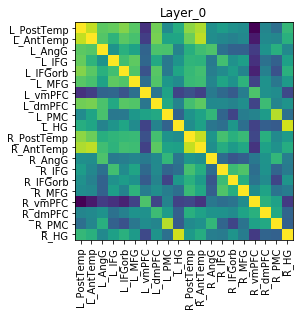

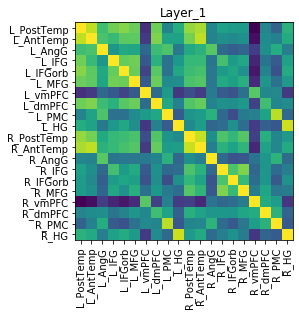

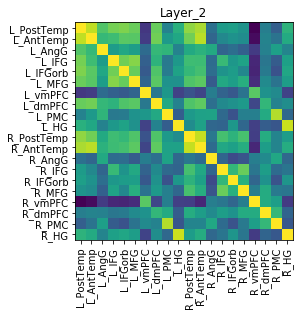

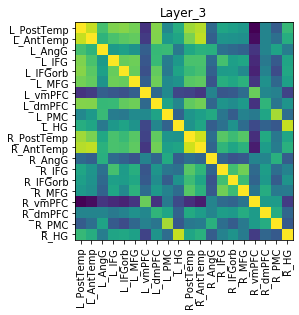

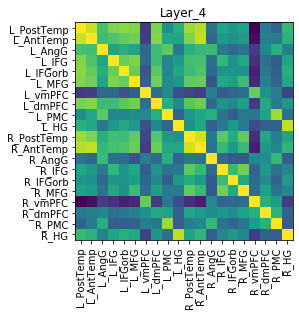

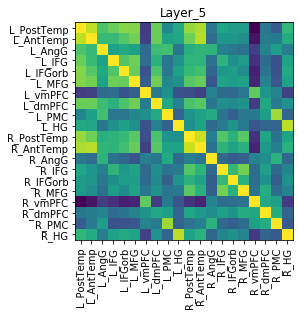

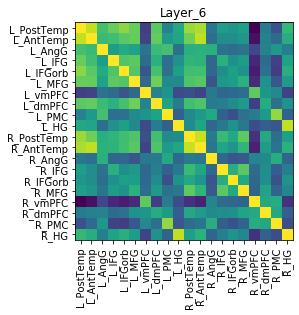

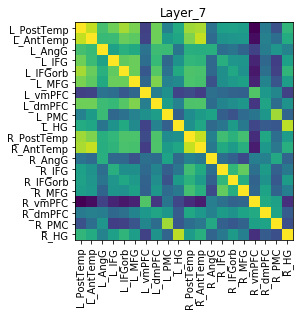

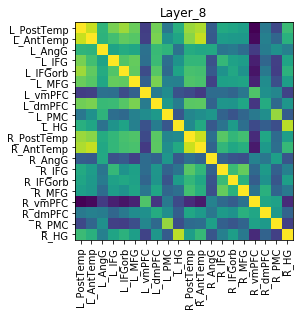

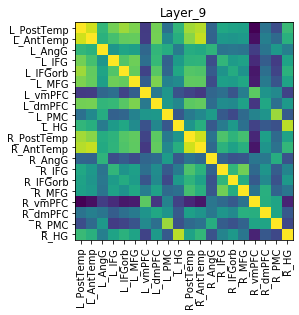

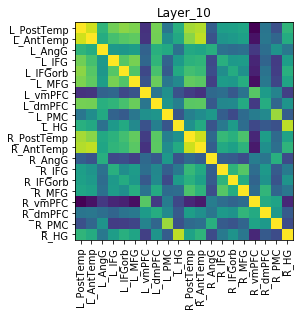

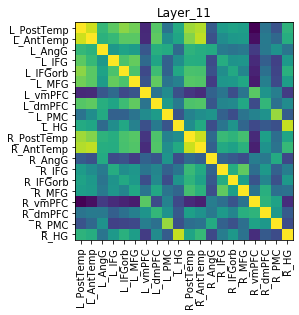

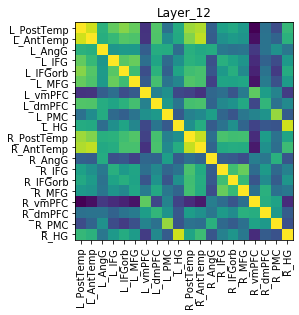

In [33]:
rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG']
roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 
for i in range(13):
    plt.figure()
    plt.title("Layer_"+str(i))
    plt.imshow(np.corrcoef(layer_weights[i]))
    plt.xticks(list(range(20)),roi_names,rotation=90)
    plt.yticks(list(range(20)),roi_names)
    

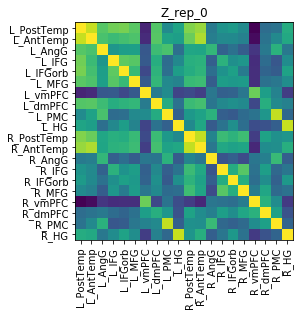

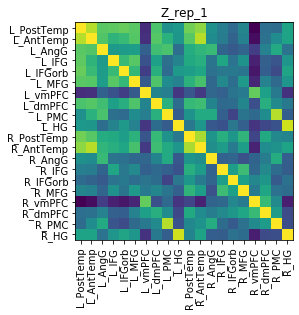

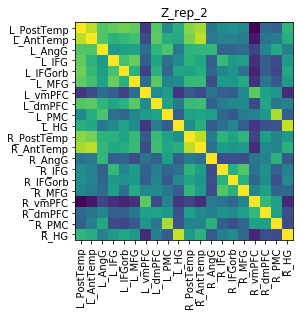

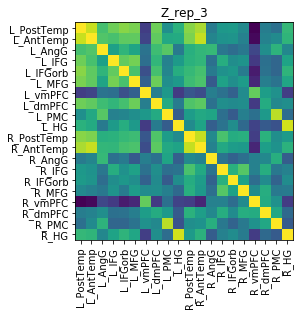

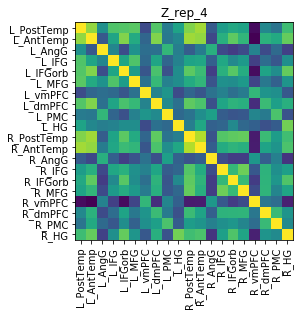

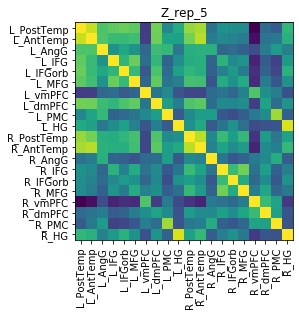

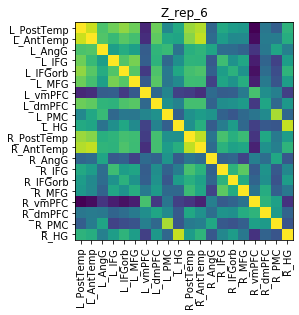

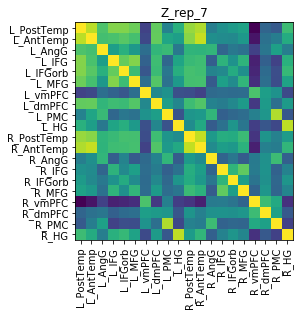

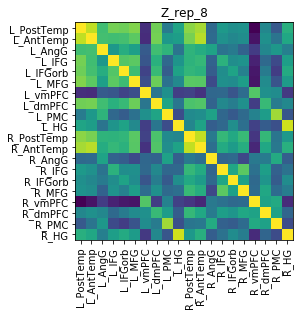

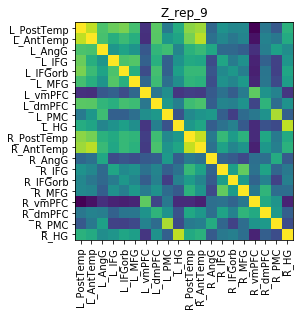

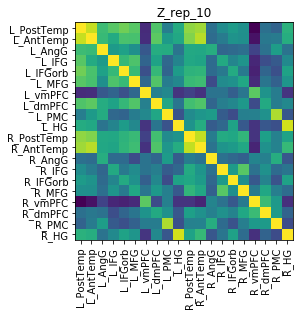

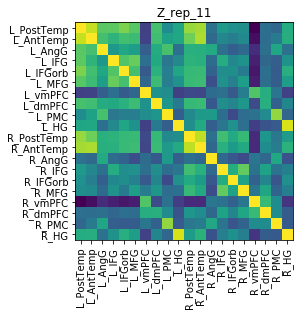

In [34]:
rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG']
roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 
for i in range(12):
    plt.figure()
    plt.title("Z_rep_"+str(i)) 
    plt.imshow(np.corrcoef(z_weights[i]))
    plt.xticks(list(range(20)),roi_names,rotation=90)
    plt.yticks(list(range(20)),roi_names)
    

([<matplotlib.axis.YTick at 0x7f557ed29bd0>,
 <a list of 20 Text yticklabel objects>)

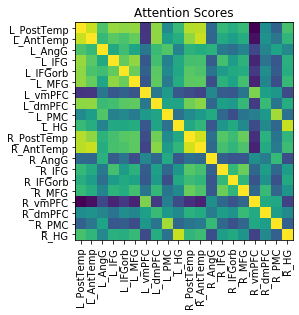

In [37]:
plt.figure()
plt.title("Attention Scores")
plt.imshow(np.corrcoef(attention_weights[0]))
plt.xticks(list(range(20)),roi_names,rotation=90)
plt.yticks(list(range(20)),roi_names)
    